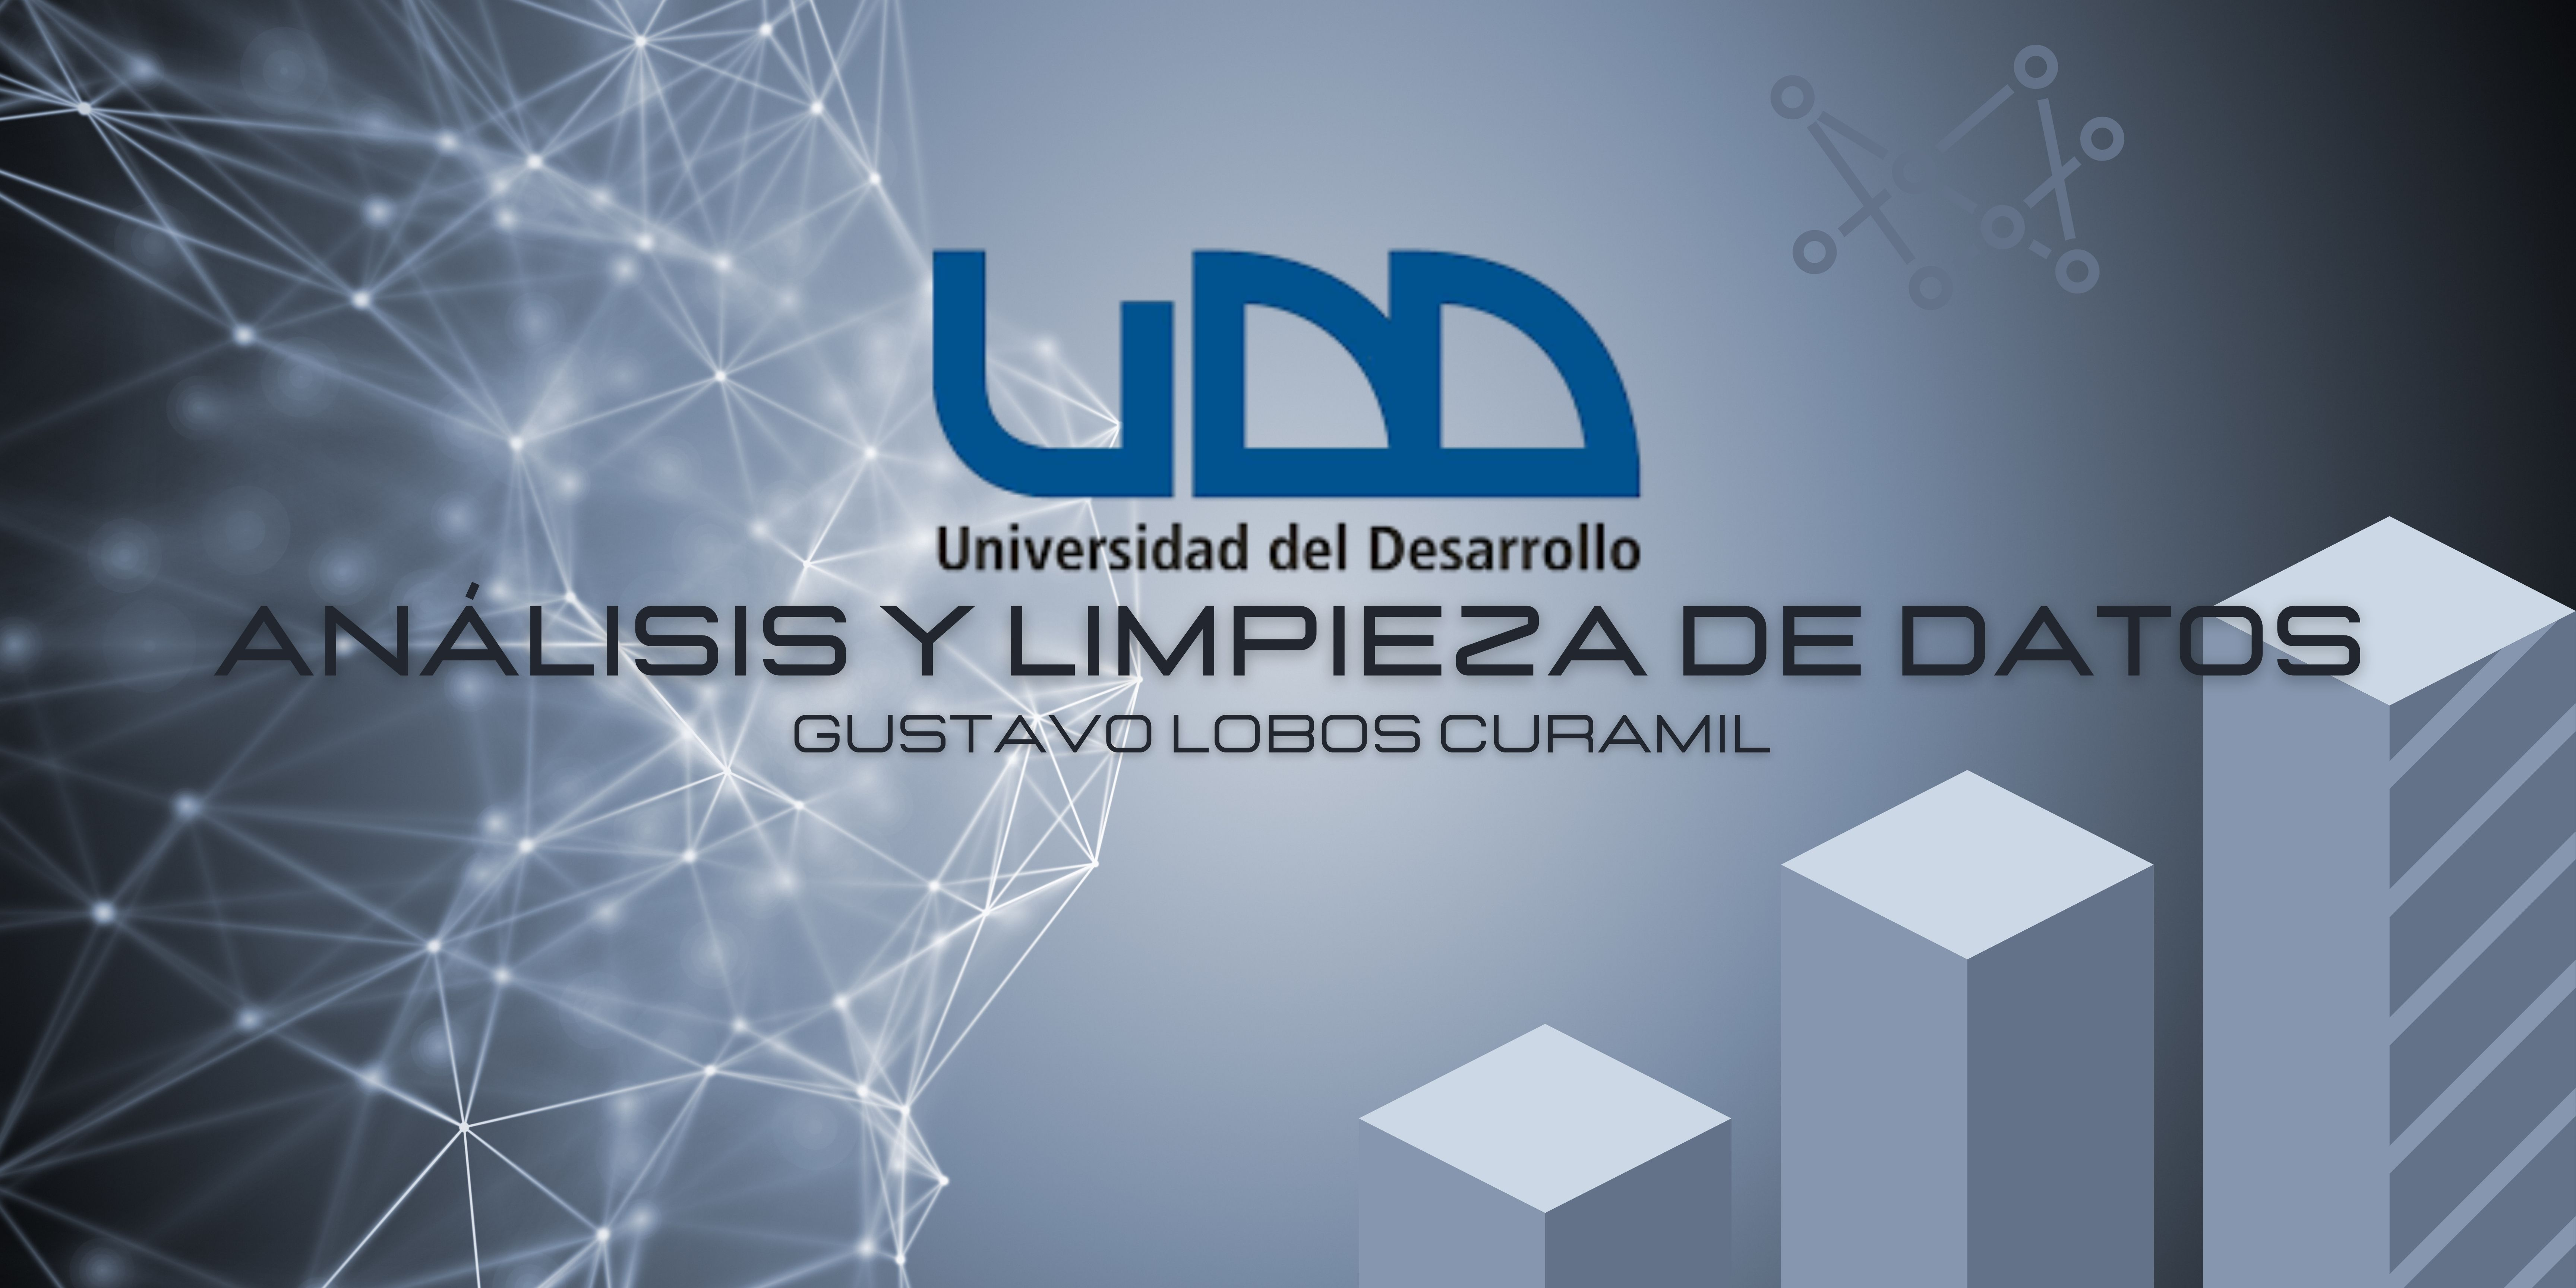
---



FACULTAD DE INGENIERÍA

TAREA  4
El objetivo de este Notebook es documentar las acciones realizadas para llevar a cabo la Tarea 4 del curso Análisis y Limpieza de datos. 

**IMPORTANTE**
Para una correcta visualización se recomienda  utilizar Google Colab, dado que este Notebook está optimizado para Colaboratory.
****
**Estudiante:**

* Gustavo Adolfo Lobos Curamil

*****

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#@title Carga del Archivo
!wget https://bit.ly/36zLjOa

--2020-10-22 05:34:51--  https://bit.ly/36zLjOa
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.udec.cl/~jorgecastillo/directores.xlsx [following]
--2020-10-22 05:34:51--  http://www.udec.cl/~jorgecastillo/directores.xlsx
Resolving www.udec.cl (www.udec.cl)... 152.74.16.83
Connecting to www.udec.cl (www.udec.cl)|152.74.16.83|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www2.udec.cl/~jorgecastillo/directores.xlsx [following]
--2020-10-22 05:34:52--  http://www2.udec.cl/~jorgecastillo/directores.xlsx
Resolving www2.udec.cl (www2.udec.cl)... 152.74.16.10
Connecting to www2.udec.cl (www2.udec.cl)|152.74.16.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135069 (132K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘36zLjOa.4’

36zLjOa.4   

**Desafío Nro. 1**

Construya una matriz 𝐴, tal que en las filas y en las columnas, columnas se encuentren los nombres de los directores, y en donde la entrada (𝑖,𝑗) de la matriz sean la cantidad de razones sociales en común que tengan los directores 𝑖 y 𝑗. Notar que esta definición es una definición de relación múltiple.

In [3]:
df1 = pd.read_excel('36zLjOa', sheet_name='directores')
df2 = pd.read_excel('36zLjOa', sheet_name='directorios')

In [4]:
df1.head(2)

,RUT,Nombre,Cargo,Fecha Nombramiento,Directorio
0,70563495,PABLO TURNER GONZÁLEZ,Presidente,2018-08-27,1
1,68617421,JAIME FERNANDO SANTA CRUZ NEGRI,Vicepresidente,2018-08-27,1


In [5]:
df2.head(2)

,index,razón social
0,1,AD RETAIL S.A.
1,2,ADMINISTRADORA DE FONDOS DE PENSIONES CAPITAL ...


In [6]:
print(df1.isnull().sum())
print()
print(df2.isnull().sum())

RUT                   0
Nombre                0
Cargo                 0
Fecha Nombramiento    0
Directorio            0
dtype: int64

index            0
razón social     0
dtype: int64


*No se encuentran datos nulos o NaN en los archivos, por lo que vamos a limpiar un poco el dataframe y prescinidr de columnas que no utilizaremos*

In [7]:
df1.drop(['RUT', 'Cargo', 'Fecha Nombramiento'], axis='columns', inplace=True)
df1.head(2)

,Nombre,Directorio
0,PABLO TURNER GONZÁLEZ,1
1,JAIME FERNANDO SANTA CRUZ NEGRI,1


In [8]:
#Se pone como Index el Directorio para copiar el nombre de la razón social del otro DataFrame
df1.set_index(df1['Directorio'], inplace=True)
df1['Razon'] = df2['razón social ']
df1.head(2)

,Nombre,Directorio,Razon
Directorio,,,
1,PABLO TURNER GONZÁLEZ,1,ADMINISTRADORA DE FONDOS DE PENSIONES CAPITAL ...
1,JAIME FERNANDO SANTA CRUZ NEGRI,1,ADMINISTRADORA DE FONDOS DE PENSIONES CAPITAL ...


In [9]:
df1.reset_index(drop=True, inplace=True)

In [10]:
#Se ordena el DataFrame nuevo
df1.reindex(columns=['Directorio','Razon','Nombre'])
df1.head(2)

,Nombre,Directorio,Razon
0,PABLO TURNER GONZÁLEZ,1,ADMINISTRADORA DE FONDOS DE PENSIONES CAPITAL ...
1,JAIME FERNANDO SANTA CRUZ NEGRI,1,ADMINISTRADORA DE FONDOS DE PENSIONES CAPITAL ...


In [11]:
#Con lo realizado anteriormente, estamos en condiciones de hacer nuestra matriz
df =pd.crosstab(df1['Directorio'],df1['Nombre'])
df =df.T.dot(df)
df.values[[np.arange(len(df))]*2] = 0
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


Nombre,ABEL BOUCHON SILVA,ABRAHAM ALAMO YAGNAM,ADEBAYO OGUNLESI -,ADOLFO GOLDENSTEIN KLECKY,ADRIAN ALEJANDRO FERNANDEZ ROSEMBERG,ADRIAN GOSTUSKI .,ADRIANA ALICIA TAPIA CIFUENTES,ADRIANO ITURBE ESCANDON,AKIRA TERAO .,ALAN GUENDELMAN PORTUGUEIS,ALAN SHERWIN LAGOS,ALBERTO ABRAHAM ROMERO SILVA,ALBERTO EGUIGUREN CORREA,ALBERTO ERNESTO CHADWICK MOLINA,ALBERTO FELIPE CORONA CAMPODÓNICO,ALBERTO GERMÁN DEL PEDREGAL LABBÉ,ALBERTO GUILLERMO SAAVEDRA OLAVARRIETA,ALBERTO HAMEL LOPEZ,ALBERTO KAUAK O`RYAN,ALBERTO LABBE GALILEA,ALBERTO LARRAÍN PRAT,ALBERTO MORGAN LAVIN,ALBERTO MUCHNICK MLYNARZ,ALBERTO RICARDO MONTANARI MAZZARELLI,ALBERTO SALAS MUÑOZ,ALEJANDRA CREMASCHI BARRIGA,ALEJANDRA DAGNINO ELISSETCHE,ALEJANDRA NAVARRETE LEGARRETA,ALEJANDRA ZARATE ROJAS,ALEJANDRO ALBERTZ KLEIN,ALEJANDRO ALFONSO GIL GOMEZ,ALEJANDRO ALVAREZ LORCA,ALEJANDRO AMENABAR TIRADO,ALEJANDRO ANDRES ARRAU DE LA SOTTA,ALEJANDRO ANDRES ROSEMBLATT KIBLISKY,ALEJANDRO ARTURO ARIAS WÜRSLIN,ALEJANDRO ENRIQUE ALARCON PEREZ,ALEJANDRO FERREIRO YAZIGI,ALEJANDRO GARCIA BRUCE,ALEJANDRO JADRESIC MARINOVIC,...,VICTOR BUNSTER HIRIART,VICTOR CLEMENTE HASSI SABAL,VICTOR HUGO PUCHI ACUÑA,VICTOR HUGO SELMAN BIESTER,VICTOR KILLMER KIEKEBUSCH,VICTOR MANUEL BEZANILLA SAAVEDRA,VICTOR MANUEL JARPA RIVEROS,VICTOR MOLLER OPAZO,VICTOR MOLLER SCHIAVETTI,VICTOR MUÑOZ ESPINOSA,VICTOR PETERMANN FERNANDEZ,VICTOR PUCCI LABATUT,VICTOR RENNER BERRY,VIRGILIO MARCHI MARCHI,VITO MOLES SCELSI,VITTORIO CORBO LIOI,VITTORIO SEGUNDO ILLINO OPAZO,VIVIANNE BLANLOT SOZA,VLADIMIR ANTONIO SCIARAFFIA VALENZUELA,VÍCTOR DE LA BARRA FUENZALIDA,VÍCTOR MANUEL VERA MORA,VÍCTOR TOLEDO SANDOVAL,WALDO FORTIN CABEZAS,WALTER JADUE JADUE,WILLIAM DALE BURGESS .,WILLIAM GEORGE -,WILLIAM PHILLIPS ARAYA,WILSON DA ROSA .,WU YONG LE,XIMENA MARCELA CONTRERAS DUFF,XIMENA PERRAMONT SANCHEZ,XIMENA ZAPATA R,YAKOB ANIBAL MOSA SHMES,YAQUB MIRZA .,YENNY NUN MELNICK,YERKO VILLELA LOPIZIC,YJIEL GUILLERMO NUN MELNICK,YOSHIRO HUILLCA .,YOVAN TRKOVIC MORENO,ÁNGEL FERNANDO CARVAJAL BENITO
Nombre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABEL BOUCHON SILVA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ABRAHAM ALAMO YAGNAM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ADEBAYO OGUNLESI -,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ADOLFO GOLDENSTEIN KLECKY,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ADRIAN ALEJANDRO FERNANDEZ ROSEMBERG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YERKO VILLELA LOPIZIC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
YJIEL GUILLERMO NUN MELNICK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
YOSHIRO HUILLCA .,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Desafío Nro. 2**

Construya el grafo asociado a la matriz 𝐴. Representarlo gráficamente, en donde los nodos más centrales se encuentren en el centro de la figura.

In [12]:
#Vamos a descargar nuestra matriz para llevarla a Gephi y poder hacer el Grafo
df.to_csv(r'matrix.csv')

In [13]:
#Se convierte la matriz de adyacencia en un grafo para poder trabajar con Networkx
G = nx.from_pandas_adjacency(df)
G.name = 'Graph from Pandas'
print(nx.info(G))

Name: Graph from Pandas
Type: Graph
Number of nodes: 1809
Number of edges: 8354
Average degree:   9.2360


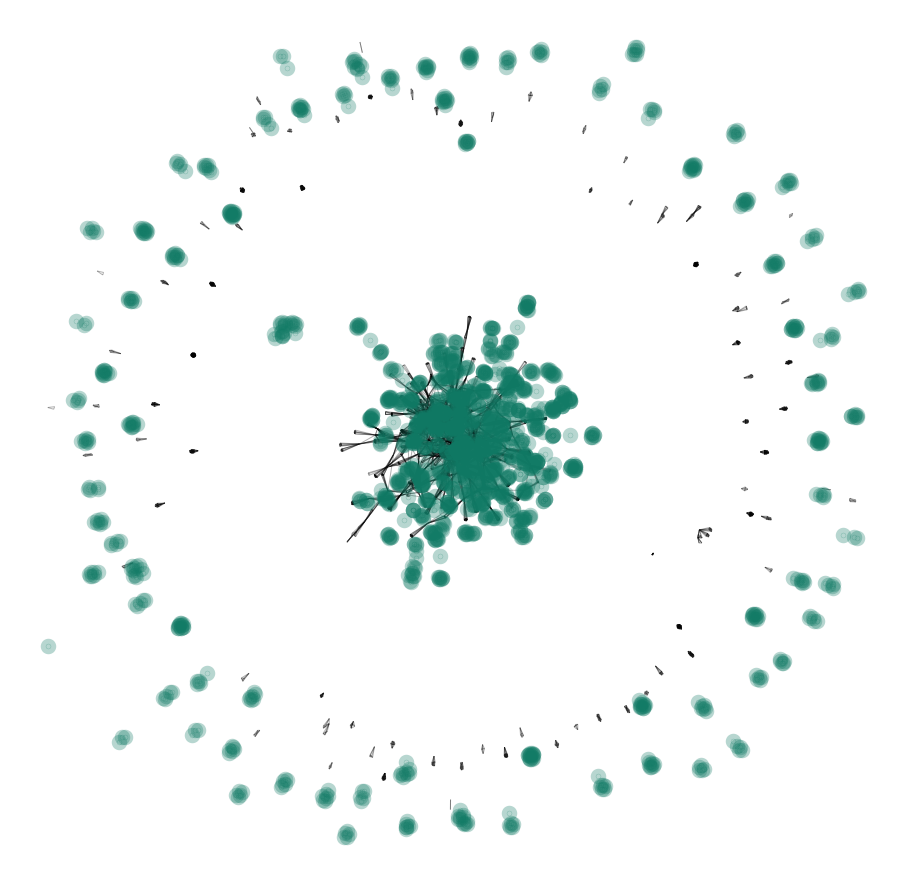

In [14]:
plt.figure(figsize=(16,16))
plt.box(False)
#nx.draw_networkx(G, node_color='lightblue', edge_color='gray', font_size=0.5, width=100, with_labels=True, node_size=2)
nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_size=30, node_color='#117A65', alpha=0.3,linewidths=10)
#nx.draw_networkx_labels(G, pos=nx.spring_layout(G), font_size=8, font_family='sans-serif')
nx.draw_networkx_edges(G, pos=nx.spring_layout(G), alpha=0.3)

In [15]:
# @title Grapho realizado con Gephi con la misma matriz
%%html
<iframe width='93%' height='800' src="//www.slideshare.net/slideshow/embed_code/key/k2s2CXKCrcbC1W" width="668" height="714" frameborder="0" marginwidth="0" marginheight="0" scrolling="no" style="border:1px solid #CCC; border-width:1px; margin-bottom:5px; max-width: 100%;" allowfullscreen> </iframe> <div style="margin-bottom:5px"> <strong> <a href="//www.slideshare.net/GustavoLobosCuramil/directorios-238936412" title="Directorios" target="_blank">Link Completo</a> </strong> via LinkedIn <strong><a href="https://www.slideshare.net/GustavoLobosCuramil" target="_blank"></a></strong> </div>

**Desafío Nro. 3**

Calcular todas las medidas de centralidad conocidas y rankear en cada una de ellas, los primeros 5 directores.

In [16]:
gcentrality = nx.degree_centrality(G)
top5_gcentralidad = sorted(gcentrality.items(),key=lambda x:x[1],reverse=True)[0:5]
df_gcentrality = pd.DataFrame(top5_gcentralidad,columns=['Nombre', 'Degree Centrality'])
df_gcentrality

,Nombre,Degree Centrality
0,HERMAN CHADWICK PIÑERA,0.027655
1,CARLOS ALBERTO HELLER SOLARI,0.021571
2,HERNAN ALBERTO BÜCHI BUC,0.021018
3,HERNAN CHEYRE VALENZUELA,0.021018
4,MIGUEL IGNACIO GUERRERO GUTIERREZ,0.019912




---



---



In [17]:
ccentrality = nx.closeness_centrality(G)
top5_ccentralidad = sorted(ccentrality.items(),key=lambda x:x[1],reverse=True)[0:5]
df_ccentrality = pd.DataFrame(top5_ccentralidad,columns=['Nombre', 'Closeness Centrality'])
df_ccentrality

,Nombre,Closeness Centrality
0,HERNAN ALBERTO BÜCHI BUC,0.199069
1,JUAN JOSÉ HURTADO VICUÑA,0.184064
2,JOSE ANTONIO GARCES SILVA,0.182490
3,BALTAZAR SÁNCHEZ GUZMÁN,0.181654
4,ARTURO CLARO FERNANDEZ,0.181496




---



---



In [18]:
bcentrality = nx.betweenness_centrality(G)
top5_bcentralidad = sorted(bcentrality.items(),key=lambda x:x[1],reverse=True)[0:5]
df_bcentrality = pd.DataFrame(top5_bcentralidad,columns=['Nombre', 'Betweenness Centrality'])
df_bcentrality

,Nombre,Betweenness Centrality
0,HERNAN ALBERTO BÜCHI BUC,0.061482
1,HERMAN CHADWICK PIÑERA,0.036551
2,ALEJANDRO FERREIRO YAZIGI,0.035817
3,CARLOS FRANCISCO CÁCERES CONTRERAS,0.035295
4,FRANCISCO GARDEWEG OSSA,0.032687




---



---



In [19]:
eigenvector = nx.eigenvector_centrality(G)
top5_eigvcentralidad = sorted(eigenvector.items(),key=lambda x:x[1],reverse=True)[0:5]
df_eigenvcentrality = pd.DataFrame(top5_eigvcentralidad,columns=['Nombre', 'Eigenvector Centrality'])
df_eigenvcentrality

,Nombre,Eigenvector Centrality
0,RAMIRO MÉNDEZ URRUTIA,0.250689
1,ALAN SHERWIN LAGOS,0.233310
2,ALBERTO FELIPE CORONA CAMPODÓNICO,0.233310
3,ALEJANDRO ALVAREZ LORCA,0.233310
4,ALFREDO JALÓN OVALLE,0.233310


**Desafío Nro. 4**

Interpretar resultados.


Después de meditar sobre los resultados del top5 de las distintas medidas de centralidad, uno se da cuenta de que no sorprenden para nada los resultados. Son personas cuyos apellidos uno lleva escuchando desde siempre. Por algo están en el centro del grafo y sus resultados los ubican en el epicentro de los cálculos. 
Es destacable que ver que algunos de estos cálculos como el 'Beteennes Centrality' nos muestra un perfil de persona que son amigos de los amigos y son el punto de conexión entre varios directorios, son como los facilitadores de los negocios, muestran una elevada presencia. Y a la vez son personas que mantienen un bajo perfil, a pesar de haber ocupado cargos públicos como Ministerios en distintos gobiernos. 
Una vez leí que el Análisis de Redes sirve para representar lo que la estadística no cubre y es verdad. Es por eso que creo que para entender como se conforman los grupos de poder y que tan estrecha es su colaboración es necesario explorar las respuestas que solo el Análisis de Redes puede otorgar. 
Hay mucho que aprender sobre gráficos y medidas de centralidad. 